# Popularity Based Recommendation Systems
## `Project By : Data Detectives`

## 1. Import Neccessory Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [2]:
df = pd.read_csv('datasets/movies.csv')

In [3]:
df.head()

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


In [4]:
df.head()

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


In [5]:
df.tail()

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
28605,390989,Sharknado 4: The 4th Awakens,Comedy Horror ScienceFiction,The new installment of the Sharknado franchise...,1.5,English,IanZiering TaraReid DavidHasselhoff,AnthonyC.Ferrante,4.3,88.0,4.574494,0,sharkattack sequel farce lasvegas creaturefeature,The Asylum Syfy BondIt,0.0,85.0
28606,159550,The Last Brickmaker in America,Drama,A man must cope with the loss of his wife and ...,5.0,NaN,SidneyPoitier WendyCrewson JayO.Sanders,GreggChampion,7.0,1.0,0.038998,8000000,friendship brickmaking,Nasser Entertainment,0.0,85.0
28607,392572,Rustom,Thriller Romance,"Rustom Pavri, an honourable officer of the Ind...",5.0,हिन्दी,AkshayKumar IleanaD'Cruz EshaGupta,TinuSureshDesai,7.3,25.0,7.333139,1000000,bollywood,KriArj Entertainment,0.0,150.0
28608,402672,Mohenjo Daro,Adventure Drama History Romance,"Village lad Sarman is drawn to big, bad Mohenj...",3.0,हिन्दी,HrithikRoshan PoojaHegde KabirBedi,AshutoshGowariker,6.7,26.0,1.423358,15050000,bollywood,UTV Motion Pictures Ashutosh Gowariker Product...,16180000.0,155.0
28609,391698,The Beatles: Eight Days a Week - The Touring Y...,Documentary Music,"The band stormed Europe in 1963, and, in 1964,...",5.0,English,PaulMcCartney RingoStarr JohnLennon,RonHoward,7.6,92.0,7.078301,0,music documentary,Imagine Entertainment Apple Corps,0.0,99.0


## 3. Data Understanding

In [6]:
df.shape

(28610, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    28610 non-null  int64  
 1   title                 28610 non-null  object 
 2   genres                28562 non-null  object 
 3   overview              28610 non-null  object 
 4   rating                28610 non-null  float64
 5   spoken_languages      28408 non-null  object 
 6   cast                  28477 non-null  object 
 7   crew                  28584 non-null  object 
 8   vote_average          28610 non-null  float64
 9   vote_count            28610 non-null  float64
 10  popularity            28610 non-null  float64
 11  budget                28610 non-null  int64  
 12  keywords              27442 non-null  object 
 13  production_companies  27547 non-null  object 
 14  revenue               28610 non-null  float64
 15  runtime            

In [8]:
df.describe()

,id,rating,vote_average,vote_count,popularity,budget,revenue,runtime
count,28610.000000,28610.00000,28610.000000,28610.000000,28610.000000,2.861000e+04,2.861000e+04,28610.000000
mean,24403.173576,3.16115,6.537078,789.528696,9.542270,2.606797e+07,9.089125e+07,109.332506
std,46330.742205,1.22482,0.916152,1397.601319,11.588478,4.135381e+07,1.787559e+08,26.329076
min,2.000000,0.50000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000
25%,2770.000000,2.12500,6.000000,72.000000,5.378874,0.000000e+00,0.000000e+00,95.000000
50%,10627.000000,3.00000,6.600000,253.000000,8.434292,8.000000e+06,2.003674e+07,106.000000
75%,22292.000000,4.00000,7.200000,844.000000,11.787784,3.500000e+07,1.022727e+08,120.000000
max,416437.000000,5.00000,10.000000,14075.000000,547.488298,3.800000e+08,2.787965e+09,1140.000000


In [9]:
df.isnull().sum()

id                         0
title                      0
genres                    48
overview                   0
rating                     0
spoken_languages         202
cast                     133
crew                      26
vote_average               0
vote_count                 0
popularity                 0
budget                     0
keywords                1168
production_companies    1063
revenue                    0
runtime                    0
dtype: int64

In [10]:
df.duplicated().sum()

23

## 4. Data Cleaning

In [11]:
df.dropna(inplace=True)

In [12]:
df = df.drop_duplicates()

## 5. Building Popularity Based Recommendation Systems Based on Weighted Rating (WR)

- We need a metric to score the movie
- Calculate score of every movie
- Sort the scores and recommend best rated movie to users
- We'll use IMDB weighted average score to score the movies

**Weighted Rating (WR)** :
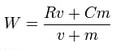

- v is the number of votes garnered by the movie
- m is the minimum number of votes required for the movie to be in the chart (the prerequisite)
- R is the mean rating of the movie from 0 to 10 (mean) = rating
- C is the mean of **vote_average**(rating) of all the movies in the dataset

source : http://trailerpark.weebly.com/imdb-rating.html?source=post_page

In [13]:
#Calculate the number of votes garnered by the 80th percentile movie
m = df['vote_count'].quantile(0.80)
m

1194.0

In [14]:
## Calculate C
C = df['vote_average'].mean()
C

6.5639963894843625

In [15]:
df = df[df['vote_count'] >= m]

df.head()

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


In [16]:
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ((v/v+m)*R) + ((m/v+m)*C)

In [17]:
df['score'] = df.apply(weighted_rating,axis=1)

In [18]:
df.head()

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17040.359041
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17040.359041
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17040.359041
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17040.359041
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17040.359041


In [19]:
df.drop(labels=['rating'],axis=1,inplace=True)

In [20]:
df.duplicated().sum()

4461

In [21]:
new_df = df.drop_duplicates()

In [22]:
new_df = new_df.sort_values('score', ascending=False)

new_df[['title','vote_count','vote_average','score','popularity']].head(10)

,title,vote_count,vote_average,score,popularity
3323,The Godfather,6024.0,8.5,17996.212720,41.109264
1439,The Shawshank Redemption,8358.0,8.5,17995.849403,51.645403
4700,Psycho,2405.0,8.3,17759.170488,36.826309
4523,One Flew Over the Cuckoo's Nest,3001.0,8.3,17758.523289,35.529554
4718,The Godfather: Part II,3418.0,8.3,17758.204671,36.629307
8655,Life Is Beautiful,3643.0,8.3,17758.063051,39.394970
17139,Spirited Away,3968.0,8.3,17757.886843,41.048867
27805,Whiplash,4376.0,8.3,17757.702688,64.299990
2352,Schindler's List,4436.0,8.3,17757.678464,41.725123
1350,Pulp Fiction,8670.0,8.3,17756.815658,140.950236


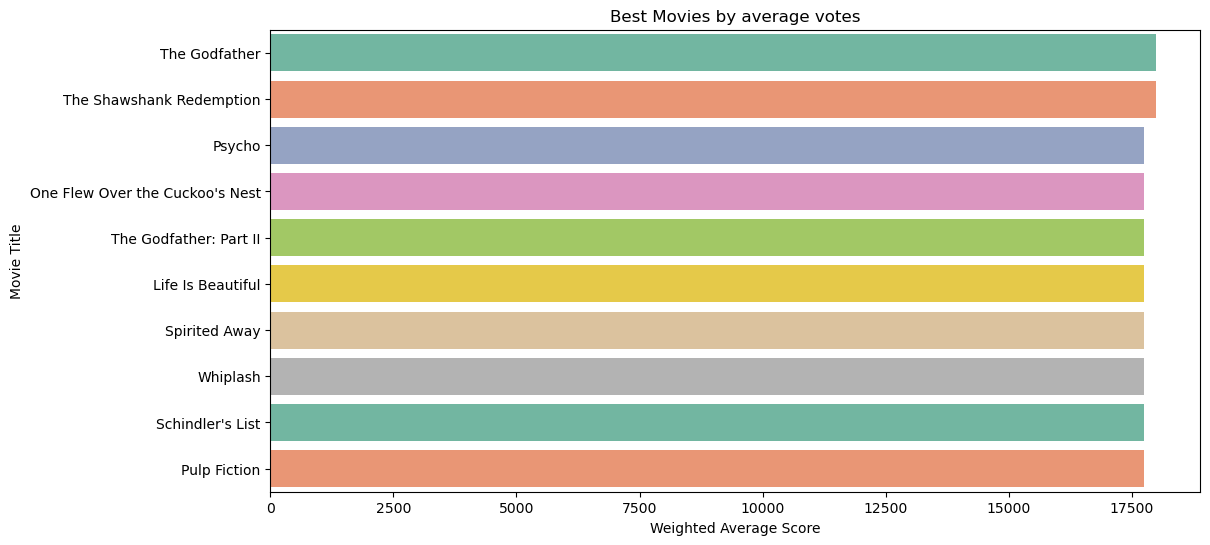

In [23]:
weight_average = new_df.sort_values('score',ascending=False)

plt.figure(figsize=(12,6))

axis1=sns.barplot(x=weight_average['score'].head(10), y=weight_average['title'].head(10), data=weight_average, palette='Set2')

plt.title('Best Movies by average votes')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')
plt.show()

## 6. Building Popularity Based Recommendation Systems Based on Popularity Score

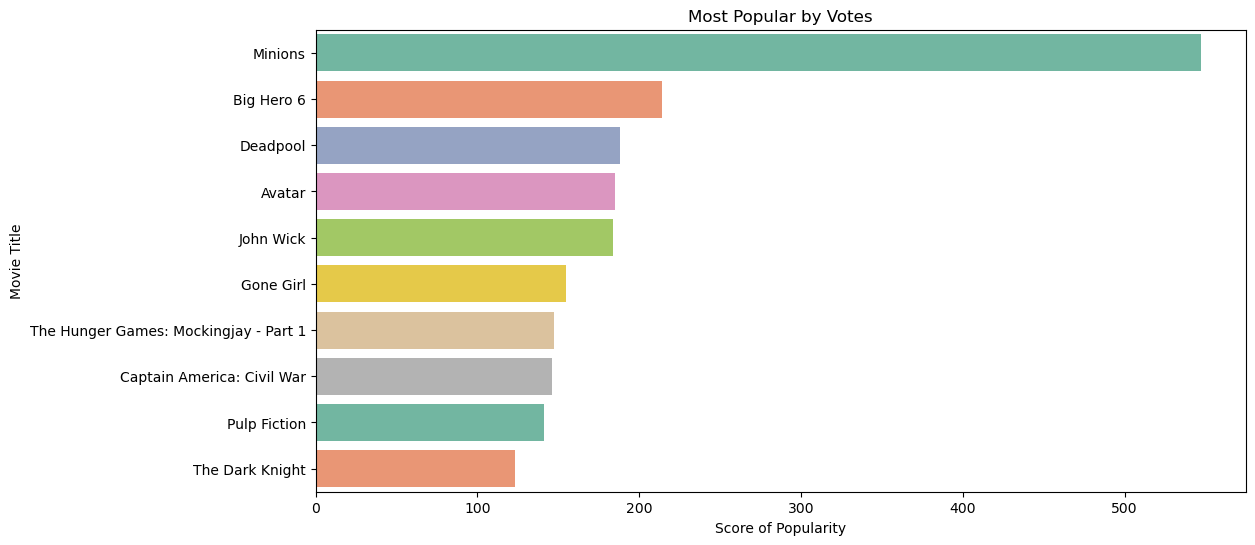

In [24]:
popularity = new_df.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,6))

ax = sns.barplot(x=popularity['popularity'].head(10), y=popularity['title'].head(10), data=popularity, palette='Set2')

plt.title('Most Popular by Votes')
plt.xlabel('Score of Popularity')
plt.ylabel('Movie Title')
plt.show()

## 7. Model Serialization & Deserialization

In [25]:
from pickle import dump

In [26]:
dump(weight_average,open('datasets/movies_popularity.pkl','wb'))

dump(popularity,open('datasets/weight_average.pkl','wb'))

In [27]:
from pickle import load

In [28]:
popularity = load(open('datasets/movies_popularity.pkl', 'rb'))
weighted_score = load(open('datasets/weight_average.pkl', 'rb'))

In [29]:
popularity.head()

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
3323,238,The Godfather,Drama Crime,"Spanning the years 1945 to 1955, a chronicle o...",English Italiano Latin,MarlonBrando AlPacino JamesCaan,FrancisFordCoppola,8.5,6024.0,41.109264,6000000,italy loveatfirstsight lossoffather patriarch ...,Paramount Pictures Alfran Productions,245066411.0,175.0,17996.212720
1439,278,The Shawshank Redemption,Drama Crime,Framed in the 1940s for the double murder of h...,English,TimRobbins MorganFreeman BobGunton,FrankDarabont,8.5,8358.0,51.645403,25000000,prison corruption policebrutality prisoncell d...,Castle Rock Entertainment Warner Bros.,28341469.0,142.0,17995.849403
4700,539,Psycho,Drama Horror Thriller,When larcenous real estate clerk Marion Crane ...,English,AnthonyPerkins VeraMiles JohnGavin,AlfredHitchcock,8.3,2405.0,36.826309,806948,hotel clerk arizona shower rain motel money se...,Paramount Pictures Universal Pictures Shamley ...,32000000.0,109.0,17759.170488
4523,510,One Flew Over the Cuckoo's Nest,Drama,While serving time for insanity at a state men...,English,JackNicholson LouiseFletcher DannyDeVito,MilošForman,8.3,3001.0,35.529554,3000000,individual rebel self-destruction wheelchair l...,United Artists Fantasy Films Warner Bros.,108981275.0,133.0,17758.523289
4718,240,The Godfather: Part II,Drama Crime,In the continuing saga of the Corleone crime f...,English Italiano Latin Español,AlPacino RobertDuvall DianeKeaton,FrancisFordCoppola,8.3,3418.0,36.629307,13000000,italo-american cuba vororte melancholy praise ...,Paramount Pictures The Coppola Company,47542841.0,200.0,17758.204671


In [30]:
weighted_score.head()

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
28352,211672,Minions,Family Animation Adventure Comedy,"Minions Stuart, Kevin and Bob are recruited by...",English,SandraBullock JonHamm MichaelKeaton,KyleBalda,6.4,4729.0,547.488298,74000000,assistant aftercreditsstinger duringcreditssti...,Universal Pictures Illumination Entertainment,1.156731e+09,91.0,15487.068998
27959,177572,Big Hero 6,Adventure Family Animation Action Comedy,The special bond that develops between plus-si...,English,ScottAdsit RyanPotter DanielHenney,ChrisWilliams,7.8,6289.0,213.849907,165000000,brotherbrotherrelationship hero talent revenge...,Walt Disney Pictures Walt Disney Animation Stu...,6.521054e+08,102.0,17159.657899
28144,293660,Deadpool,Action Adventure Comedy,Deadpool tells the origin story of former Spec...,English,RyanReynolds MorenaBaccarin EdSkrein,TimMiller,7.4,11444.0,187.860492,58000000,antihero mercenary marvelcomic superhero based...,Twentieth Century Fox Film Corporation Marvel ...,7.831130e+08,108.0,16681.096538
25172,19995,Avatar,Action Adventure Fantasy ScienceFiction,"In the 22nd century, a paraplegic Marine is di...",English Español,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,7.2,12114.0,185.070892,237000000,cultureclash future spacewar spacecolony socie...,Ingenious Film Partners Twentieth Century Fox ...,2.787965e+09,162.0,16442.058660
27933,245891,John Wick,Action Thriller,Ex-lunatic John Wick comes off his meds to tra...,Magyar English Pусский,KeanuReeves MichaelNyqvist AlfieAllen,ChadStahelski,7.0,5499.0,183.870374,20000000,hitman russianmafia revenge murder gangster do...,Summit Entertainment Warner Bros. 87Eleven Def...,8.876166e+07,101.0,16203.836932


# Thank You